<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/w12_text_data_analysis_yleekim2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴스 카테고리 분류

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train_news, y_train_news), (X_test_news, y_test_news) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train_news) + 1
print(category, '카테고리')
print(X_train_news.shape, '학습용 뉴스 기사')
print(X_test_news.shape, '테스트용 뉴스 기사')
print('**', X_train_news[0])
print('^^', y_train_news[0])

46 카테고리
(8982,) 학습용 뉴스 기사
(2246,) 테스트용 뉴스 기사
** [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
^^ 3


## LSTM으로 분류하기

In [76]:
# 단어의 수를 맞추어 줍니다.
X_train_news = sequence.pad_sequences(X_train_news, maxlen=100)
X_test_news = sequence.pad_sequences(X_test_news, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train_news = to_categorical(y_train_news)
y_test_news = to_categorical(y_test_news)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history_news = model.fit(X_train_news, y_train_news, batch_size=20, epochs=200, validation_data=(X_test_news, y_test_news), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test_news, y_test_news)[1]))

Epoch 1/200
450/450 [==============================] - 22s 44ms/step - loss: 2.2259 - accuracy: 0.4398 - val_loss: 2.0601 - val_accuracy: 0.4978
Epoch 2/200
450/450 [==============================] - 7s 15ms/step - loss: 1.8075 - accuracy: 0.5456 - val_loss: 1.7186 - val_accuracy: 0.5610
Epoch 3/200
450/450 [==============================] - 6s 13ms/step - loss: 1.6190 - accuracy: 0.5837 - val_loss: 1.6082 - val_accuracy: 0.5850
Epoch 4/200
450/450 [==============================] - 5s 11ms/step - loss: 1.5053 - accuracy: 0.6094 - val_loss: 1.5268 - val_accuracy: 0.6109
Epoch 5/200
450/450 [==============================] - 6s 12ms/step - loss: 1.3737 - accuracy: 0.6520 - val_loss: 1.4345 - val_accuracy: 0.6483
Epoch 6/200
450/450 [==============================] - 5s 10ms/step - loss: 1.2238 - accuracy: 0.6939 - val_loss: 1.3478 - val_accuracy: 0.6509
Epoch 7/200
450/450 [==============================] - 6s 12ms/step - loss: 1.1155 - accuracy: 0.7159 - val_loss: 1.2598 - val_accuracy

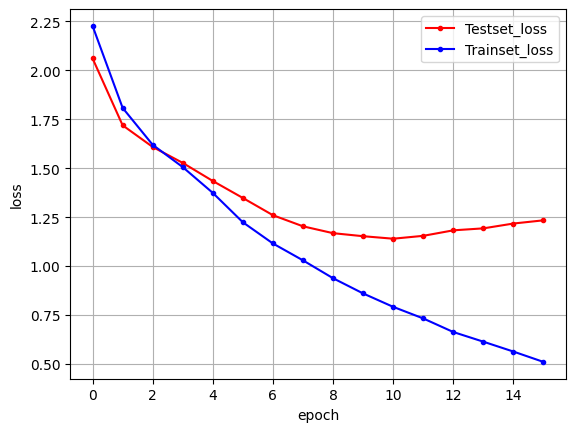

In [77]:
# 학습셋과 테스트셋의 오차를 저장합니다.
import numpy as np

y_vloss_news = history_news.history['val_loss']
y_loss_news = history_news.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss_news))  # 리스트의 길이를 구하는 방법은 len() 함수를 사용합니다.
plt.plot(x_len, y_vloss_news, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_news, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##  분류결과 분석

In [78]:
#분류결과 확인하기
# 예측 결과를 얻습니다.
y_pred_news = model.predict(X_test_news)  # x_test는 테스트 데이터입니다.

# 각 예측 결과에서 가장 높은 확률을 가지는 클래스(카테고리)를 선택합니다.
predicted_categories = [np.argmax(pred) for pred in y_pred_news]

# 카테고리 데이터 출력
print(predicted_categories)


71/71 [==============================] - 1s 4ms/step
[3, 10, 13, 3, 13, 3, 3, 3, 3, 3, 1, 4, 1, 3, 13, 21, 23, 3, 19, 3, 8, 3, 3, 3, 9, 3, 4, 6, 10, 3, 3, 10, 4, 3, 19, 4, 19, 1, 4, 3, 13, 19, 3, 3, 4, 4, 3, 4, 3, 11, 20, 3, 4, 3, 3, 3, 32, 4, 19, 19, 4, 3, 4, 4, 4, 3, 3, 1, 3, 4, 19, 16, 3, 19, 30, 0, 1, 3, 23, 4, 3, 3, 3, 2, 19, 19, 1, 11, 28, 3, 3, 4, 3, 19, 3, 11, 2, 3, 3, 1, 16, 3, 4, 3, 3, 24, 4, 13, 4, 4, 19, 3, 3, 3, 33, 3, 4, 4, 3, 4, 3, 4, 19, 4, 18, 3, 19, 3, 4, 3, 8, 3, 1, 3, 24, 4, 1, 1, 3, 3, 3, 3, 4, 4, 19, 2, 4, 13, 3, 3, 13, 4, 3, 3, 4, 1, 3, 3, 11, 17, 3, 3, 11, 4, 3, 4, 3, 10, 3, 3, 3, 19, 3, 19, 3, 21, 4, 17, 3, 3, 3, 20, 3, 20, 3, 21, 3, 3, 6, 35, 8, 3, 11, 11, 8, 11, 3, 4, 4, 4, 17, 16, 19, 3, 3, 3, 4, 19, 16, 3, 3, 4, 3, 3, 3, 20, 4, 11, 3, 3, 3, 3, 3, 4, 13, 3, 41, 16, 25, 3, 4, 20, 3, 11, 9, 1, 3, 3, 11, 19, 11, 1, 4, 4, 11, 3, 3, 4, 19, 3, 4, 4, 3, 3, 25, 4, 21, 4, 32, 11, 8, 4, 4, 4, 30, 3, 4, 4, 3, 1, 11, 19, 3, 34, 20, 3, 4, 19, 19, 3, 32, 4, 16, 4, 3, 3, 3

In [80]:
from tensorflow.keras.datasets import reuters

# 로이터 뉴스 데이터셋 불러오기
(_, _), (_, y_test_news) = reuters.load_data(num_words=1000, test_split=0.2)

# 단어 인덱스를 가져오기
word_index = reuters.get_word_index()

# 숫자 레이블을 텍스트 레이블로 변환
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
category_labels = [reverse_word_index.get(i - 3, '?') for i in y_test_news]

# 예측 결과를 원래 텍스트 레이블로 변환하여 출력
predicted_category_labels = [reverse_word_index.get(i - 3, '?') for i in predicted_categories]

# 예측된 카테고리 텍스트 출력
print(predicted_category_labels)



['?', 'a', 'for', '?', 'for', '?', '?', '?', '?', '?', '?', 'the', '?', '?', 'for', 'on', 'is', '?', '1', '?', 'said', '?', '?', '?', 'and', '?', 'the', 'to', 'a', '?', '?', 'a', 'the', '?', '1', 'the', '1', '?', 'the', '?', 'for', '1', '?', '?', 'the', 'the', '?', 'the', '?', 'mln', 'pct', '?', 'the', '?', '?', '?', '2', 'the', '1', '1', 'the', '?', 'the', 'the', 'the', '?', '?', '?', '?', 'the', '1', 'it', '?', '1', 'be', '?', '?', '?', 'is', 'the', '?', '?', '?', '?', '1', '1', '?', 'mln', 'at', '?', '?', 'the', '?', '1', '?', 'mln', '?', '?', '?', '?', 'it', '?', 'the', '?', '?', 'that', 'the', 'for', 'the', 'the', '1', '?', '?', '?', 'will', '?', 'the', 'the', '?', 'the', '?', 'the', '1', 'the', '000', '?', '1', '?', 'the', '?', 'said', '?', '?', '?', 'that', 'the', '?', '?', '?', '?', '?', '?', 'the', 'the', '1', '?', 'the', 'for', '?', '?', 'for', 'the', '?', '?', 'the', '?', '?', '?', 'mln', 'reuter', '?', '?', 'mln', 'the', '?', 'the', '?', 'a', '?', '?', '?', '1', '?', '1', '

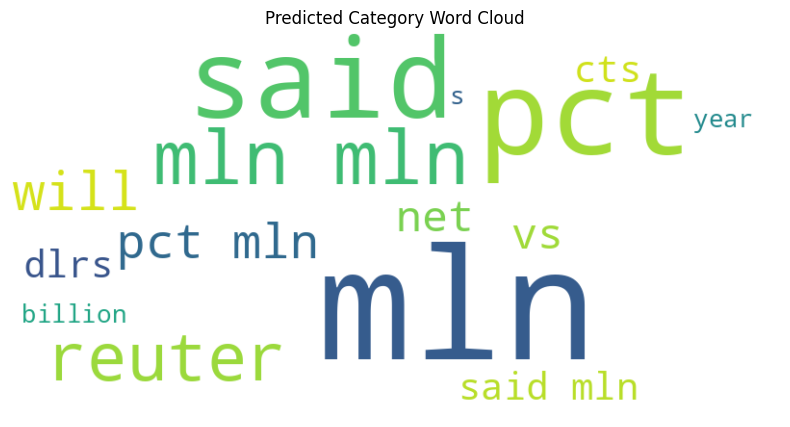

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 예측된 카테고리 텍스트 데이터를 하나의 문자열로 합칩니다.
predicted_category_text = ' '.join(predicted_category_labels)

# 워드클라우드 생성 및 설정
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(predicted_category_text)

# 워드클라우드를 시각화합니다.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Predicted Category Word Cloud")
plt.show()


## 분석결과

1. 가장 빈도가 높은 카테고리: 모델이 예측한 뉴스 카테고리 중에서 mln이 가장 높다.

다양한 카테고리: 워드클라우드에 다양한 카테고리 텍스트가 포함되어 있다면, 모델이 다양한 카테고리로 예측하는 경향이 있다는 것을 나타낼 수 있습니다. 이는 모델이 다양한 주제를 다루는 로이터 뉴스 데이터셋에 대한 일반화 능력을 가지고 있다는 것을 시사할 수 있습니다.

특정 키워드 도출: 워드클라우드에서 특정 키워드나 주제가 두드러지게 나타난다면, 모델이 특정 주제 또는 키워드에 대해 강한 예측력을 가지고 있다는 것을 나타낼 수 있습니다. 이것은 모델이 특정 주제나 키워드와 관련된 뉴스를 잘 분류하고 있다는 것을 의미합니다.

Epoch 1/5
57/57 [==============================] - 9s 102ms/step - loss: 2.6587 - accuracy: 0.3333 - val_loss: 2.4025 - val_accuracy: 0.3450
Epoch 2/5
57/57 [==============================] - 3s 47ms/step - loss: 2.3359 - accuracy: 0.3914 - val_loss: 2.1270 - val_accuracy: 0.4524
Epoch 3/5
57/57 [==============================] - 1s 24ms/step - loss: 2.0199 - accuracy: 0.4917 - val_loss: 2.0083 - val_accuracy: 0.4930
Epoch 4/5
57/57 [==============================] - 1s 20ms/step - loss: 1.8422 - accuracy: 0.5286 - val_loss: 1.7406 - val_accuracy: 0.5721
Epoch 5/5
71/71 [==============================] - 1s 3ms/step


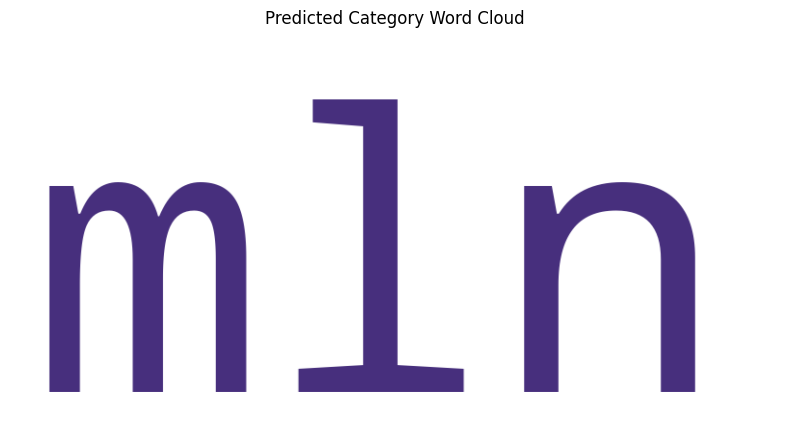

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud

# 로이터 뉴스 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 카테고리 레이블의 원래 텍스트를 얻기 위한 딕셔너리 생성
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
category_labels = [reverse_word_index.get(i - 3, '?') for i in y_test]

# 데이터 전처리: 시퀀스 패딩
maxlen = 100  # 시퀀스 길이 제한
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# LSTM 모델 구성
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# 모델 예측
y_pred = model.predict(X_test)
predicted_categories = [np.argmax(pred) for pred in y_pred]

# 예측된 카테고리 레이블을 실제 뉴스 카테고리로 변환
predicted_category_labels = [reverse_word_index.get(i - 3, '?') for i in predicted_categories]

# 워드클라우드 생성
predicted_category_text = ' '.join(predicted_category_labels)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(predicted_category_text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Predicted Category Word Cloud")
plt.show()


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud

# 로이터 뉴스 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 전처리: 시퀀스 패딩
maxlen = 100  # 시퀀스 길이 제한
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# LSTM 모델 구성 > 뉴스카테고리 46개로 분류 예측하기
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# 모델 예측
y_pred = model.predict(X_test)
predicted_categories = [np.argmax(pred) for pred in y_pred]

# 원래 뉴스 카테고리 레이블 가져오기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
category_labels = [reverse_word_index.get(i, '?') for i in y_test]

# 예측된 카테고리 레이블을 실제 뉴스 카테고리로 변환
predicted_category_labels = [reverse_word_index.get(i, '?') for i in predicted_categories]


Epoch 1/5
57/57 [==============================] - 8s 98ms/step - loss: 2.6665 - accuracy: 0.3361 - val_loss: 2.4008 - val_accuracy: 0.3450
Epoch 2/5
57/57 [==============================] - 2s 40ms/step - loss: 2.2047 - accuracy: 0.4288 - val_loss: 2.0117 - val_accuracy: 0.4903
Epoch 3/5
57/57 [==============================] - 2s 40ms/step - loss: 1.9461 - accuracy: 0.5091 - val_loss: 1.8028 - val_accuracy: 0.5392
Epoch 4/5
57/57 [==============================] - 1s 20ms/step - loss: 1.8402 - accuracy: 0.5083 - val_loss: 1.8422 - val_accuracy: 0.5548
Epoch 5/5
71/71 [==============================] - 1s 4ms/step


In [91]:
#예측한 뉴스 카테고리
predicted_categories[:5]

[3, 19, 19, 4, 19]

In [95]:
len(word_index)

30979

In [94]:
list(word_index.items())[:5]

[('mdbl', 10996),
 ('fawc', 16260),
 ('degussa', 12089),
 ('woods', 8803),
 ('hanging', 13796)]

In [90]:
#뉴스 카테고리 레이블로 변환하기
predicted_category_labels[:5]

['to', 'from', 'from', 'in', 'from']

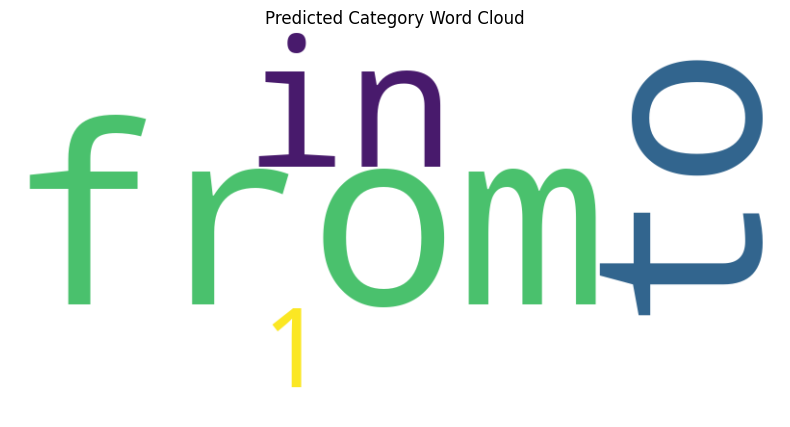

In [86]:
from collections import Counter
from wordcloud import WordCloud

# 예측된 카테고리 레이블을 빈도수로 계산
predicted_category_counts = Counter(predicted_category_labels)

# 빈도수가 있는지 확인
if len(predicted_category_counts) > 0:
    # 워드클라우드 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(predicted_category_counts)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Predicted Category Word Cloud")
    plt.show()
else:
    print("빈도수가 있는 단어가 없습니다.")


## 뉴스 카테고리 예측 결과 분석

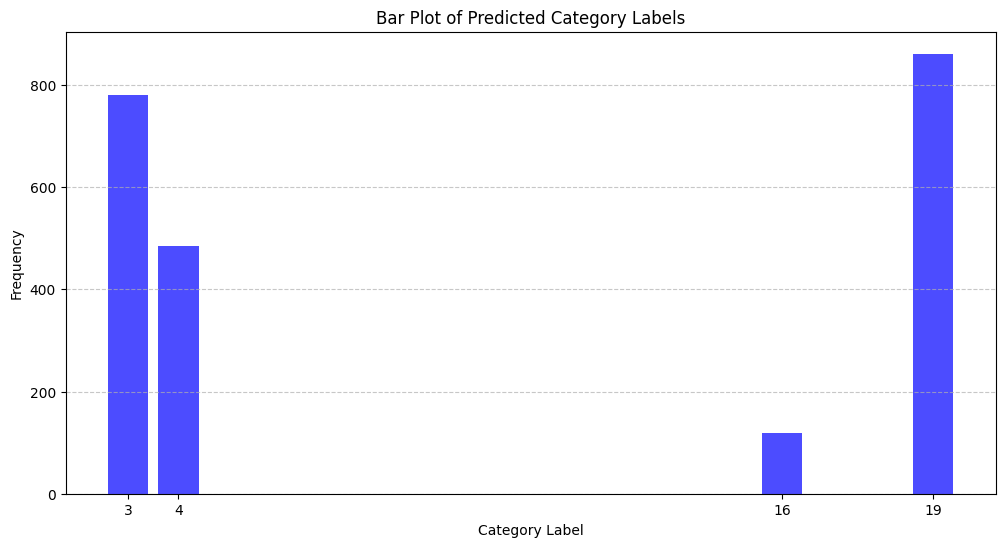

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# 예측된 카테고리 레이블의 빈도수 계산
unique_labels, label_counts = np.unique(predicted_categories, return_counts=True)

# 막대 그래프로 빈도수 시각화
plt.figure(figsize=(12, 6))
plt.bar(unique_labels, label_counts, color='blue', alpha=0.7, align='center')
plt.xlabel('Category Label')
plt.ylabel('Frequency')
plt.title('Bar Plot of Predicted Category Labels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(unique_labels)
plt.show()



In [103]:
from tensorflow.keras.datasets import reuters

# 뉴스 카테고리 이름 얻기
(_, _), (_, y_test) = reuters.load_data()
category_names = reuters.get_word_index()
category_names = {category_names[key]: key for key in category_names}

# 카테고리 이름 출력
category_labels = [category_names[i] for i in [3, 4, 16, 19]]
print(category_labels)

['to', 'in', '1', 'from']


# 영화리뷰 데이터 분석

## LSTM, CNN 모델 생성

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다.
X_train_imdb = sequence.pad_sequences(X_train_imdb, maxlen=500)
X_test_imdb = sequence.pad_sequences(X_test_imdb, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 55)                26400     
                                                                 
 dense_7 (Dense)             (None, 1)                 56        
                                                      

## 이진 분류 > 긍정/부정 예측

In [106]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history_imdb = model.fit(X_train_imdb, y_train_imdb, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test_imdb, y_test_imdb)[1]))

Epoch 1/100
469/469 [==============================] - 44s 88ms/step - loss: 0.2248 - accuracy: 0.9147 - val_loss: 0.2560 - val_accuracy: 0.8955
Epoch 2/100
469/469 [==============================] - 18s 38ms/step - loss: 0.1842 - accuracy: 0.9313 - val_loss: 0.2894 - val_accuracy: 0.8859
Epoch 3/100
469/469 [==============================] - 13s 27ms/step - loss: 0.1462 - accuracy: 0.9471 - val_loss: 0.2793 - val_accuracy: 0.8858
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3586 - accuracy: 0.8718

 Test Accuracy: 0.8718


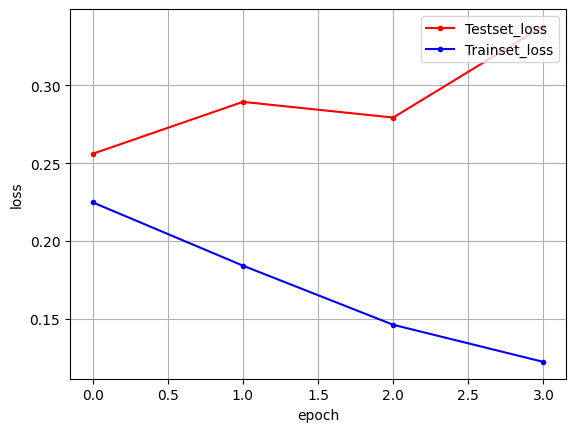

In [107]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history_imdb.history['val_loss']
y_loss = history_imdb.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [109]:
#분류결과 확인하기
# 예측 결과를 얻습니다.
y_pred = model.predict(X_test_imdb)  # x_test는 테스트 데이터입니다.

# 각 예측 결과에서 가장 높은 확률을 가지는 클래스(카테고리)를 선택합니다.
predicted_categories = [np.argmax(pred) for pred in y_pred]

# 카테고리 데이터 출력
print(predicted_categories)


782/782 [==============================] - 3s 4ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

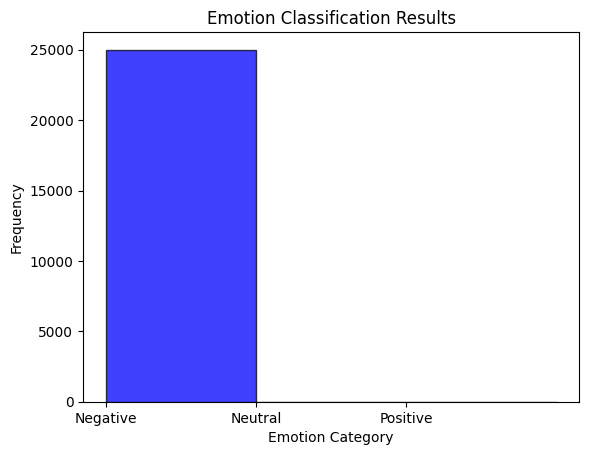

In [112]:
import matplotlib.pyplot as plt

# 모델의 예측 결과 (numerical_category)를 히스토그램으로 표시
plt.hist(predicted_categories, bins=[0, 0.5, 1, 1.5], align='mid', alpha=0.75, color='blue', edgecolor='black')

# 히스토그램 레이블 및 제목 설정
plt.xlabel('Emotion Category')
plt.ylabel('Frequency')
plt.xticks([0, 0.5, 1], ['Negative', 'Neutral', 'Positive'])
plt.title('Emotion Classification Results')

# 히스토그램 표시
plt.show()


##  워드클라우드 시각화

In [115]:
from keras.datasets import imdb

# IMDB 데이터셋 로드
(X_train_org, y_train_org), (X_test_org, y_test_org) = imdb.load_data(num_words=1000)

# 원본 단어 사전 로드
word_index = imdb.get_word_index()

# 숫자를 원래의 단어로 변환하는 함수 정의
def decode_review(review):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = [reverse_word_index.get(i - 3, '?') for i in review]
    return decoded_review

# 훈련 데이터와 테스트 데이터의 첫 번째 샘플을 변환하여 출력
#  변환하는데 시간이 너무오래 걸려 숫자를 줄임
decoded_review_train = [decode_review(review) for review in X_train_org[:5]]
decoded_review_test = [decode_review(review) for review in X_test_org[:5]]


print("훈련 데이터 첫 번째 샘플:")
print(decoded_review_train[0])
print("\n테스트 데이터 첫 번째 샘플:")
print(decoded_review_test[0])


훈련 데이터 첫 번째 샘플:
['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', '?', '?', 'story', 'direction', '?', 'really', '?', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', '?', '?', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', '?', 'with', 'this', 'film', 'the', '?', '?', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', '?', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', '?', '?', 'was', 'amazing', 'really', '?', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', '?', 'at', 'a', 'film', 'it', 'must', 'have', 'been', 'good', 'and', 'this', 'definite

In [124]:
import pandas as pd
from tensorflow.keras.datasets import imdb

# 데이터 프레임 생성
df_train = pd.DataFrame({'review': decoded_review_train, 'sentiment': y_train[:5]})
df_test = pd.DataFrame({'review': decoded_review_test, 'sentiment': y_test[:5]})

# CSV 파일로 저장
df_train.to_csv('imdb_train.csv', index=False)
df_test.to_csv('imdb_test.csv', index=False)


In [125]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 저장한 CSV 파일 불러오기
df_train = pd.read_csv('imdb_train.csv')
df_test = pd.read_csv('imdb_test.csv')

# 훈련 데이터와 테스트 데이터 합치기
df_combined = pd.concat([df_train, df_test])

# 합친 데이터프레임에서 리뷰 텍스트 추출
reviews = df_combined['review'].values



In [151]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK에서 불용어 다운로드
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# 불용어 정의
stop_words = set(stopwords.words('english'))
stop_words.update(['br', "'", 's', 'n'])
stop_words.update([',', '?', "'the", "'and", "'of", "'to", "'is", "'this", "'br", "'in", "'it", '``', "''", "'that", "'was", "'film", "'with", "'as", "'you", "'but"])
#print(stop_words)

# 불용어 제거 및 텍스트 토큰화
filtered_reviews = []
for review in reviews:
    word_tokens = word_tokenize(review)
    filtered_review = [word for word in word_tokens if word.lower() not in stop_words]
    filtered_reviews.append(' '.join(filtered_review))

filtered_reviews[0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"[ 'just 'brilliant 'casting 'story 'direction 'really 'part 'they 'played 'could 'just 'imagine 'being 'there 'robert 'an 'amazing 'actor 'now 'same 'being 'director 'father 'came 'from 'same 'myself 'so 'loved 'fact 'there 'real 'throughout 'were 'great 'just 'brilliant 'so 'much 'soon 'released 'for 'would 'recommend 'everyone 'watch 'amazing 'really 'at 'end 'so 'sad 'know 'what 'they 'say 'if 'at 'must 'have 'been 'good 'definitely 'also 'two 'little 'played 'paul 'they 'were 'just 'brilliant 'children 'are 'often 'left 'out 'think 'because 'stars 'play 'them 'all 'up 'are 'such 'big 'for 'whole 'these 'children 'are 'amazing 'should 'be 'for 'what 'they 'have 'done n't 'think 'whole 'story 'so 'because 'true 'life 'after 'all 'us 'all ]"

## 단어빈도그래프 시각화

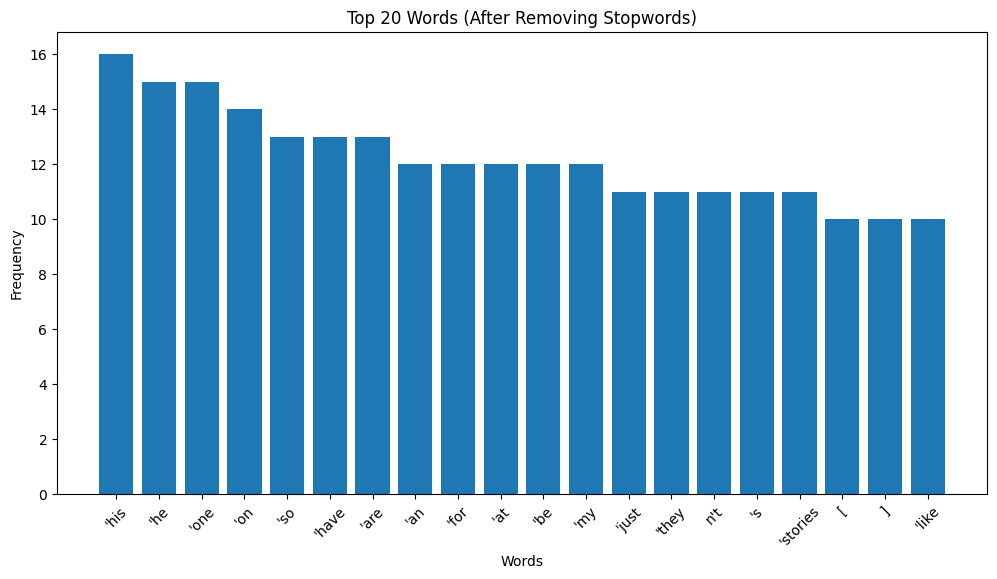

In [153]:
# 단어 빈도 계산
filtered_text = ' '.join(filtered_reviews)

word_counts = Counter(filtered_text.split())

# 가장 빈도가 높은 단어 20개 추출
top_words = word_counts.most_common(20)

# for word in enumerate(top_words, start=1):
#   print(word)

# 단어와 빈도수를 각각 리스트로 분리
words, counts = zip(*top_words)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Words (After Removing Stopwords)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

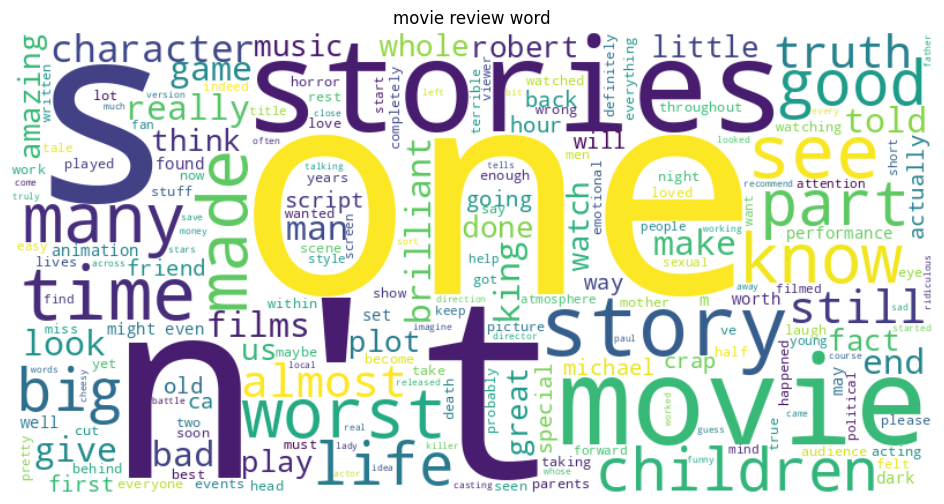

In [154]:
# 워드클라우드 생성
filtered_text = ' '.join(filtered_reviews)
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(filtered_text)

# 워드클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('movie review word')
plt.axis("off")

plt.show()

## 네트워크X 그래프 생성

In [156]:
import pandas as pd
import networkx as nx
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# 저장한 CSV 파일 불러오기
df_train = pd.read_csv('imdb_train.csv')
df_test = pd.read_csv('imdb_test.csv')

# 훈련 데이터와 테스트 데이터 합치기
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# 'review' 열에서 텍스트 데이터 추출
text_data = df_combined['review'].tolist()

# 텍스트 데이터 전처리 (예: 불용어 제거 등)
# 불용어 목록 로드
stop_words = set(stopwords.words('english'))
# 전치사와 추가할 불용어 목록
additional_stop_words = set(["is", "in", "of", "his", "was", "at", "to", "as", "for", "an", "its", "on", "in",
                             "the", "and", "to", "this", "it", "that"])
# 불용어 목록에 추가
stop_words.update(additional_stop_words)

# 텍스트 데이터 전처리 (불용어 제거 등)
tokens = []
for text in text_data:
    # 텍스트를 소문자로 변환
    text = text.lower()
    # 토큰화
    words = word_tokenize(text)
    # 불용어 제거 및 단어 길이가 1 이상인 단어만 선택
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
    tokens.extend(filtered_words)



In [157]:
# NetworkX 그래프 생성
G = nx.Graph()

# 토큰 카운트
token_counts = Counter(tokens)

# 네트워크에 노드 추가 (단어)
for token, count in token_counts.items():
  if token not in stop_words:
    G.add_node(token, count=count)

# 단어 간의 관계를 엣지로 추가
for i in range(len(tokens) - 1):
    word1, word2 = tokens[i], tokens[i + 1]
    if not G.has_edge(word1, word2):
        G.add_edge(word1, word2, weight=1)
    else:
        G[word1][word2]['weight'] += 1



불용어를 제거해도 네트워크 내에서 연결성이 높은 다른 단어들에 의해 Centrality에서 상위에 나올 수 있습니다. 이는 네트워크 구조와 각 단어의 사용 빈도에 따라 결정되기 때문.

In [158]:
# 네트워크 지표 계산
print("Number of nodes (words):", len(G.nodes()))
print("Number of edges (connections between words):", len(G.edges()))

# Degree Centrality 계산
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality (Top 10 words):")
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for word, centrality in sorted_degree_centrality[:10]:
    print(f"{word}: {centrality:.4f}")


Number of nodes (words): 460
Number of edges (connections between words): 1460

Degree Centrality (Top 10 words):
'the: 0.3268
'and: 0.1983
'of: 0.1656
'to: 0.1525
'is: 0.1394
'this: 0.1242
'in: 0.1176
'it: 0.1068
'that: 0.1046
'was: 0.0828


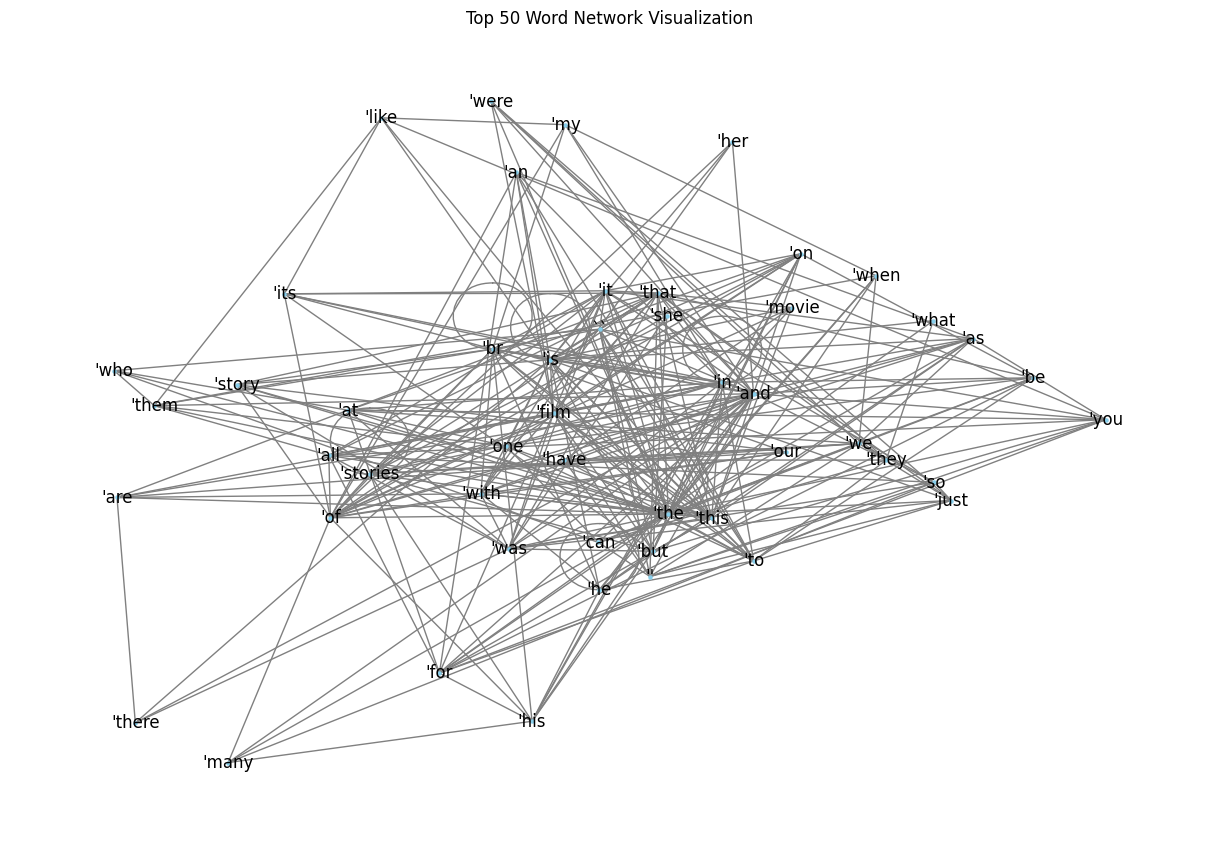

In [159]:
import matplotlib.pyplot as plt

# 그래프 시각화
pos = nx.spring_layout(G, k=0.2)  # 그래프 레이아웃 설정
plt.figure(figsize=(12, 8))

# 상위 50개의 노드만 선택
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
top_nodes = [node[0] for node in top_nodes]

# 상위 50개 노드만 그래프에 표시 (노드 레이블 추가)
subgraph = G.subgraph(top_nodes)
labels = {node: node for node in top_nodes}  # 노드 레이블 설정
nx.draw(subgraph, pos, node_size=5, node_color='skyblue', edge_color='gray', labels=labels)
plt.title('Top 50 Word Network Visualization')
plt.show()

